In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
import matplotlib.colors as colors
import cartopy.feature as cfea

In [2]:
"""
# -180, 90                    180, 90
#    -----------------------------
#    |  1   |   2  |  3   |   4  |
#    |      |      |      |      |   
     |----------------------------
#    |  5   |   6  |  7   |   8  |         
#    |      |      |      |      |                    
#    -----------------------------
# -180, -90                   180, -90
"""
# 10800, 10800
# 21600, 43200

'\n# -180, 90                    180, 90\n#    -----------------------------\n#    |  1   |   2  |  3   |   4  |\n#    |      |      |      |      |   \n     |----------------------------\n#    |  5   |   6  |  7   |   8  |         \n#    |      |      |      |      |                    \n#    -----------------------------\n# -180, -90                   180, -90\n'

141715.3
0.0


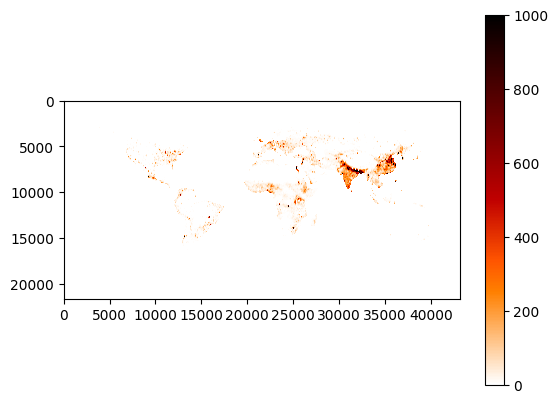

In [4]:
# concatenate ascii
"""you need 60GB memory"""
conc_flag = False

if conc_flag is True:
    root = '/mnt/c/Users/tsimk/Downloads/research/H08'
    xcoef, ycoef = 10800, 10800
    tmp = np.empty((2*ycoef, 4*xcoef))
    
    for domain in range(1, 9):
        gwp_path = f"{root}/additional_data/GPWv4/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-rev11_2010_30_sec_asc/gpw_v4_population_count_adjusted_to_2015_unwpp_country_totals_rev11_2010_30_sec_{domain}.asc"
        data = np.loadtxt(gwp_path, skiprows=6)
        
        if domain <=4:
            xstart, xend = xcoef*(domain - 1), xcoef*domain
            ystart, yend = 0, ycoef
        else:
            xstart, xend = xcoef*(domain - 5), xcoef*(domain - 4)
            ystart, yend = ycoef, ycoef*2
            
        tmp[ystart:yend, xstart:xend] = data
        
    tmp_masked = np.ma.masked_where(tmp == -9999, tmp)
    plt.imshow(tmp_masked, cmap='gist_heat_r', vmax=1e3)
    plt.colorbar()
    print(np.max(tmp_masked))
    print(np.min(tmp_masked))

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


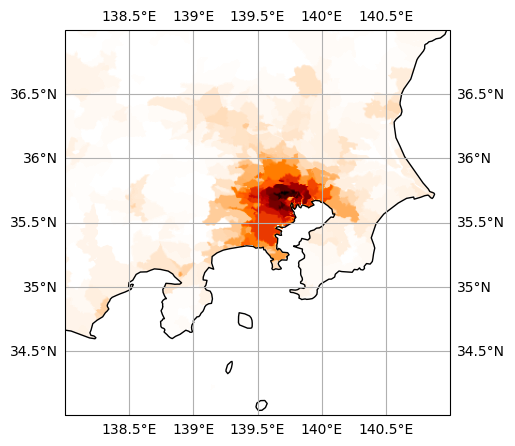

In [6]:
def geography():
    SUF = '.30s'
    dtype = 'float32'
    #
    a = 21600
    b = 43200
    gl2shape = (a, b)
    #
    city_num = 1
    #
    # region
    one = 138
    two = 141
    three = 34
    four = 37
    #
    resolution = 120
    upperindex = (90-four)*resolution
    lowerindex = (90-three)*resolution
    leftindex = (180+one)*resolution
    rightindex = (180+two)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num
    
a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()
pop_cropped = tmp_masked[upperindex:lowerindex, leftindex:rightindex]

fig = plt.figure(figsize=(5,5))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent)
ax.gridlines(draw_labels=True)
im = ax.imshow(pop_cropped, origin='upper',extent=img_extent, transform=projection, cmap='gist_heat_r')

115


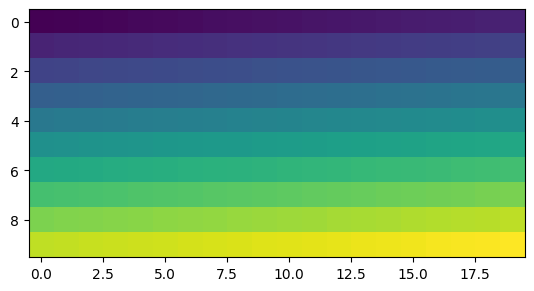

In [7]:
"""
pythonの記入規則
reshape(y, x)
a[y, x]
であることに注意
"""
a = np.arange(200).reshape(10,20)
plt.imshow(a)
print(a[5, 15])

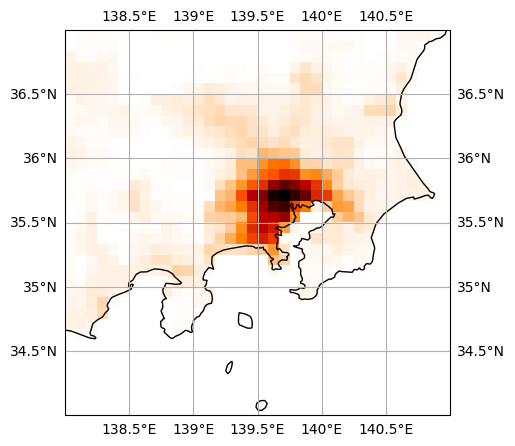

In [99]:
def geography():
    SUF = '.gl5'
    dtype = 'float32'
    #
    a = 2160
    b = 4320
    gl2shape = (a, b)
    #
    city_num = 1
    #
    # region
    one = 138
    two = 141
    three = 34
    four = 37
    #
    resolution = 12
    upperindex = (90-four)*resolution
    lowerindex = (90-three)*resolution
    leftindex = (180+one)*resolution
    rightindex = (180+two)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (one, two, three, four)
    
    return a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num

a, b, upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent, city_num = geography()
gl5_cropped = r2gl5_filled[upperindex:lowerindex, leftindex:rightindex]

fig = plt.figure(figsize=(5,5))
projection = ccrs.PlateCarree()
ax = plt.subplot(projection=projection)
ax.coastlines()
ax.set_extent(img_extent)
ax.gridlines(draw_labels=True)
im = ax.imshow(gl5_cropped, origin='upper',extent=img_extent, transform=projection, cmap='gist_heat_r')

In [8]:
# wrte_binary
save_flag = False
if save_flag is True:
    err = 1e20
    tmp_filled = tmp_masked.filled(err)
    h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/pop_tot_'
    savepath_gl5 = f"{h08dir}/GPW4ag__20100000.30s" 
    tmp_filled.astype(np.float32).tofile(savepath_gl5)

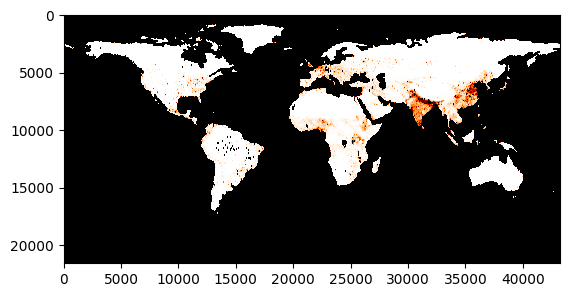

In [9]:
# read_binary
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/pop_tot_'
loadpath = f"{h08dir}/GPW4ag__20100000.30s" 
tmp = np.fromfile(loadpath, dtype='float32').reshape(21600, 43200)
plt.imshow(tmp, cmap='gist_heat_r', vmax=1e3)